In [1]:
import pandas as pd
import numpy as np
import codecs
from time import perf_counter
from algorithms.fptas import FPTAS
from algorithms.weights_dp import WeightsDP
from algorithms.costs_dp import CostsDP
from algorithms.two_approx import TwoApprox
from algorithms.branches_and_bounds import BnB
import matplotlib.pyplot as plt

In [2]:
def parse_data(file_num):  # TODO: add base dir
    capacity = codecs.open(f"data/p0{file_num}_c.txt", "r", "utf_8_sig").read()
    weights = codecs.open(f"data/p0{file_num}_w.txt", "r", "utf_8_sig").read()
    costs = codecs.open(f"data/p0{file_num}_p.txt", "r", "utf_8_sig").read()
    optimal = codecs.open(f"data/p0{file_num}_s.txt", "r", "utf_8_sig").read()

    data = {
        'capacity': int(capacity.strip()),
        'weights': [int(w.strip()) for w in weights.splitlines()],
        'costs': [int(c.strip()) for c in costs.splitlines()],
        'optimal': [int(i.strip()) for i in optimal.splitlines()],
    }
    return data

In [3]:
results = pd.DataFrame(
    columns=['Benchmark_№', 'Algorithm', 'Average_time', 'Number_of_operations', 'Cost', 'Weight'])

algo_dict = {TwoApprox: 'TwoApprox', BnB: 'Branches and bounds', WeightsDP: 'WeightsDP', CostsDP: 'CostsDP',
             FPTAS: 'FPTAS'}

In [4]:
def measure_time(algorithm, benchmark, capacity, weights, costs, iterations=100):
    global results
    total_time = 0
    for i in range(iterations):
        start_time = perf_counter()
        algo = algorithm(capacity, weights, costs)
        result, operations = algo.solve()
        end_time = perf_counter()
        total_time += end_time - start_time
    total_time /= iterations
    print(algo_dict[algorithm], ':\n', result)
    print('Number of operations:', operations)
    print('Average execution time:', total_time, '\n')
    results = results.append(
        {'Benchmark_№': benchmark, 'Algorithm': algo_dict[algorithm], 'Average_time': total_time, 'Number_of_operations': operations,
         'Cost': result.knapsack_cost, 'Weight': result.knapsack_weight}, ignore_index = True)

In [5]:
for i in range(1, 8):
    data = parse_data(i)
    print(f'Optimal result for {i} example:', data['optimal'])
    print('Optimal cost:', np.sum(np.array(data['optimal']) * np.array(data['costs'])))
    print('Optimal weight:', np.sum(np.array(data['optimal']) * np.array(data['weights'])), '\n')

    for a in [TwoApprox, BnB, WeightsDP, CostsDP, FPTAS]:
        measure_time(a, i, data['capacity'], data['weights'], data['costs'])

    print('\n\n')

Optimal result for 1 example: [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
Optimal cost: 309
Optimal weight: 165 

TwoApprox :
 Cost of knapsack: 309 
Weight of knapsack: 165
Included items: [1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
Number of operations: 21
Average execution time: 6.205499999998753e-05 

Branches and bounds :
 Cost of knapsack: 309.0 
Weight of knapsack: 165.0
Included items: [1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
Number of operations: 25
Average execution time: 0.0006784030000000385 

WeightsDP :
 Cost of knapsack: 309 
Weight of knapsack: 165.0
Included items: [1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
Number of operations: 1672
Average execution time: 0.0061708889999999884 

CostsDP :
 Cost of knapsack: 309.0 
Weight of knapsack: 165
Included items: [1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
Number of operations: 7192
Average execution time: 0.027544702999999983 

FPTAS :
 Cost of knapsack: 309.0 
Weight of knapsack: 165
Included items: [1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
Number of operations: 7752
Average execution time:

In [6]:
results

,Benchmark_№,Algorithm,Average_time,Number_of_operations,Cost,Weight
0,1,TwoApprox,0.000062,21,309,165
1,1,Branches and bounds,0.000678,25,309,165
2,1,WeightsDP,0.006171,1672,309,165
3,1,CostsDP,0.027545,7192,309,165
4,1,FPTAS,0.057379,7752,309,165
5,2,TwoApprox,0.000035,11,47,23
6,2,Branches and bounds,0.003625,55,51,26
7,2,WeightsDP,0.000500,142,51,26
8,2,CostsDP,0.001822,510,51,26
9,2,FPTAS,0.007122,1032,51,26


In [7]:
def draw(results):
    benchmark_no = [i for i in range(1, 8)]
    plt.figure(figsize = (15, 10))
    plt.title('Average execution time')
    plt.xlabel('Benchmark №')
    plt.ylabel('Average time')
    for alg in set(results['Algorithm']):
        execution_time = list(results[results['Algorithm'] == alg]['Average_time'])
        plt.plot(benchmark_no, execution_time, label = alg)
    plt.legend()
    plt.show()
        
        

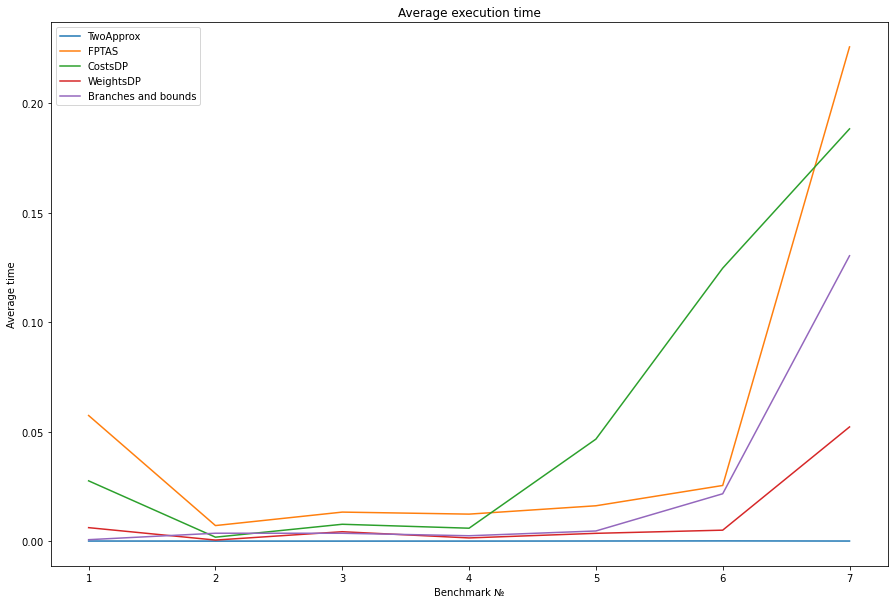

In [8]:
draw(results)